# Worksheet 3. Machine Learning
## Girls in Data Science Camp

In this worksheet, we will be working with the [Nutrition Facts for McDonald's Menu](https://www.kaggle.com/datasets/mcdonalds/nutrition-facts?resource=download) data, which contains nutritional information of items sold at McDonald across 9 food categories. 
<br>
<img src="img/logo.png" alt="Logo" style="width: 300px; display: block; margin-left: auto; margin-right: auto;"/>
From the original dataset, we will be excluding the `Item` and `Serving Size` columns, as they are not relevant to the machine learning model we are about to build. Integrating these columns with the predictors used in this worksheet is beyond the scope of this camp.

In [21]:
# Load libraries
library(tidyverse)
library(dplyr)
library(tidymodels)
set.seed(100)

In [3]:
macdonalds <- read_csv("menu.csv")
head(macdonalds, 5)
dim(macdonalds)

Rows: 260 Columns: 24
-- Column specification --------------------------------------------------------
Delimiter: ","
chr  (3): Category, Item, Serving Size
dbl (21): Calories, Calories from Fat, Total Fat, Total Fat (% Daily Value),...

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13,20,5,25,0,...,31,10,4,17,3,17,10,0,25,15
Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8,12,3,15,0,...,30,10,4,17,3,18,6,0,25,8
Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23,35,8,42,0,...,29,10,4,17,2,14,8,0,25,10
Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28,43,10,52,0,...,30,10,4,17,2,21,15,0,30,15
Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23,35,8,42,0,...,30,10,4,17,2,21,6,0,25,10


[1] 260  24

Each row in this dataset represents a specific item sold at McDonald's. For instance, the first row contains the nutritional information for "Egg McMuffin", categorized under "Breakfast" according to its `Category`.

### Exercise 0: Knowledge Check
For each of the cases below, determine whether it is more suitable to use **classification** or **regression**. 

- Predicting whether an email is spam or not: 
- Predicting the price of a house based on its features (e.g., size, location, number of rooms): 
- Identifying different species of animals based on their physical characteristics: 
- Determining whether a movie character belongs to a Pixar film or a Disney film: 

### Exercise 1: Performing Explanatory Data Analysis

#### 1.1 Inspecting Columns In Data
Before proceeding further, let's perform a brief inspection of the columns in our dataset. We will investigate the class of each column and list all the columns present in the data.

In [22]:
### YOUR CODE HERE

In [5]:
glimpse(macdonalds)

Rows: 260
Columns: 22
$ Category                        <fct> Breakfast, Breakfast, Breakfast, Break~
$ Calories                        <dbl> 300, 250, 370, 450, 400, 430, 460, 520~
$ `Calories from Fat`             <dbl> 120, 70, 200, 250, 210, 210, 230, 270,~
$ `Total Fat`                     <dbl> 13, 8, 23, 28, 23, 23, 26, 30, 20, 25,~
$ `Total Fat (% Daily Value)`     <dbl> 20, 12, 35, 43, 35, 36, 40, 47, 32, 38~
$ `Saturated Fat`                 <dbl> 5, 3, 8, 10, 8, 9, 13, 14, 11, 12, 12,~
$ `Saturated Fat (% Daily Value)` <dbl> 25, 15, 42, 52, 42, 46, 65, 68, 56, 59~
$ `Trans Fat`                     <dbl> 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0~
$ Cholesterol                     <dbl> 260, 25, 45, 285, 50, 300, 250, 250, 3~
$ `Cholesterol (% Daily Value)`   <dbl> 87, 8, 15, 95, 16, 100, 83, 83, 11, 11~
$ Sodium                          <dbl> 750, 770, 780, 860, 880, 960, 1300, 14~
$ `Sodium (% Daily Value)`        <dbl> 31, 32, 33, 36, 37, 40, 54, 59, 54, 59~
$ Carbohydrates   

#### 1.2 Removing Unwanted Columns
As discussed, let's exclude the `Item` and `Serving Size` columns from the dataset for the upcoming activities. Additionally, we will convert the `Category` column to the _factor_ class. 

Explain the distinctions between the `factor` and `character` classes in R, and illustrate the advantages of converting the `Category` column into a `factor`.

In [23]:
### YOUR CODE HERE

In [4]:
macdonalds <- macdonalds |>
    select(-Item, -`Serving Size`) |>
    mutate(Category = as_factor(Category))
head(macdonalds, 5)

Category,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Breakfast,300,120,13,20,5,25,0,260,87,...,31,10,4,17,3,17,10,0,25,15
Breakfast,250,70,8,12,3,15,0,25,8,...,30,10,4,17,3,18,6,0,25,8
Breakfast,370,200,23,35,8,42,0,45,15,...,29,10,4,17,2,14,8,0,25,10
Breakfast,450,250,28,43,10,52,0,285,95,...,30,10,4,17,2,21,15,0,30,15
Breakfast,400,210,23,35,8,42,0,50,16,...,30,10,4,17,2,21,6,0,25,10


> **YOUR ANSWER HERE**

#### 1.3 Look into Distinct Categories
Given that each row in this dataset represents distinct items sold at McDonald's, let's determine the count of items belonging to each food category.

**<span style='color:orange'>Hint:</span>** Start by grouping all items by their `Category` and then count how many items fall into each `Category`. Your final data frame should have two columns: `Category` and `Count`.

In [24]:
### YOUR CODE HERE

In [6]:
macdonalds_category <- macdonalds |>
    group_by(Category) |>
    summarize(Count = n())
macdonalds_category

Category,Count
<fct>,<int>
Breakfast,42
Beef & Pork,15
Chicken & Fish,27
Salads,6
Snacks & Sides,13
Desserts,7
Beverages,27
Coffee & Tea,95
Smoothies & Shakes,28


#### 1.4 Converting to Percentage
Let's add a new column named `Percentage` to indicate the proportion of items in each `Category`. Make sure that the final dataframe is sorted in descending order based on these percentages (e.g., From the highest percentage to the lowest percentage).

In [26]:
### YOUR CODE HERE

In [7]:
macdonalds_category <- macdonalds_category |>
    mutate(Percentage = round(Count / sum(Count) * 100, 2))
macdonalds_category

Category,Count,Percentage
<fct>,<int>,<dbl>
Breakfast,42,16.15
Beef & Pork,15,5.77
Chicken & Fish,27,10.38
Salads,6,2.31
Snacks & Sides,13,5.00
Desserts,7,2.69
Beverages,27,10.38
Coffee & Tea,95,36.54
Smoothies & Shakes,28,10.77


#### 1.5 Creating a Pie Chart (Challenge)
Let's create a pie chart that shows the percentage distribution of each food category sold at McDonald's. Each category will be represented by a slice in the pie, color-coded accordingly.

**<span style='color:orange'>Hint:</span>** Use `geom_bar(stat="identity", width=1)` in your `ggplot` code to create the pie chart. Set `x = ""` in the `ggplot` initialization.

In [27]:
options(repr.plot.width = 8, repr.plot.height = 6)
### YOUR CODE HERE

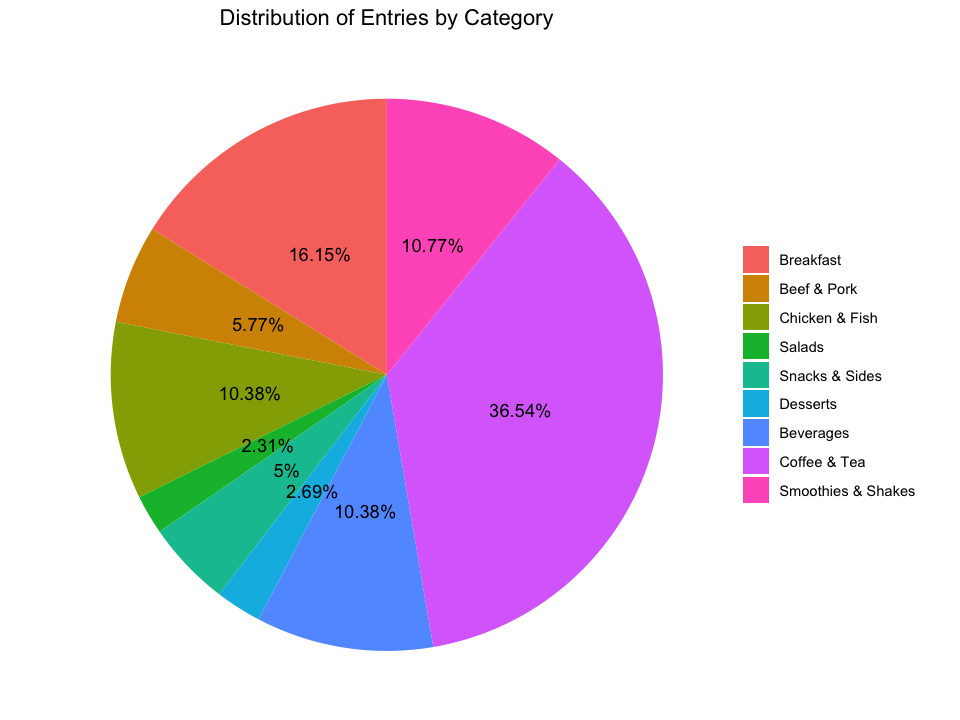

In [8]:
options(repr.plot.width = 8, repr.plot.height = 6)

ggplot(macdonalds_category, aes(x = "", y = Count, fill = Category)) +
    geom_bar(stat = "identity", width = 1) +
    coord_polar(theta = "y") +
    theme_void() +
    labs(title = "Distribution of Entries by Category") +
    geom_text(aes(label = paste0(Percentage, "%")), 
              position = position_stack(vjust = 0.5)) +
    theme(legend.title = element_blank(),
         plot.title = element_text(hjust = 0.5)) 

## Exercise 2. Building Machine Learning Model
In this exercise, we will build a classification model for Chef Ronald, who works at McDonald's headquarters. Ronald is preparing to launch his new recipe, "Pancake with a Hint of Chicken", but needs help classifying it into a specific food category. We will develop a machine learning model to classify this new item based on its nutritional information.
<br>
<img src="img/chef.png" alt="Chef" style="width: 300px; display: block; margin-left: auto; margin-right: auto;"/>

#### 2.1 Train, Test and Split
Let's use the "Train, Test, and Split" method to divide our `mcdonalds` dataset into training and testing data, setting the split ratio (initial_split) to $80$%. How many rows and columns of data do we have in each set?

Why do we need to split our data into train and test sets? Explain in one or two sentences. 

In [28]:
### YOUR CODE HERE

In [31]:
macdonlads_split <- initial_split(macdonalds, prop=0.8)
macdonalds_train <- training(macdonlads_split)
macdonalds_test <- testing(macdonlads_split)

cat(paste0("Dimensions of the training set are: ", paste(dim(macdonalds_train), collapse = " x ")), "\n")
cat(paste0("Dimensions of the testing set are: ", paste(dim(macdonalds_test), collapse = " x ")))

Dimensions of the training set are: 208 x 22 
Dimensions of the testing set are: 52 x 22

> **YOUR ANSWER HERE**

#### 2.2 Building Model and Recipe
Let's create a classification model using the k-Nearest Neighbor (k-NN) approach with $k=3$, following these guidelines:
- **Recipe**: Utilize all predictors in the dataset, excluding the `Category` column, which serves as our target variable.
- **Modeling**:  Initialize the modeling strategy with `weight_func="rectangular"`, use "kknn" as the engine, and set "classification" as the mode.

In [29]:
### YOUR CODE HERE

In [10]:
macdonalds_recipe <- recipe(Category ~ ., data=macdonalds_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

In [11]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 3) |>
  set_engine("kknn") |>
  set_mode("classification")

#### 2.3 Fit the Data into the Workflow
Let's combine the recipe and model we previously defined to fit our `mcdonalds_train` data into a workflow. Follow these steps:
1. Initialize the workflow.
2. Specify the recipe.
3. Incloude the model.
4. Fit the training data.

In [17]:
knn_fit <- workflow() |>
    add_recipe(macdonalds_recipe) |>
    add_model(knn_spec) |>
    fit(data=macdonalds_train)

In [18]:
validation <- predict(knn_fit, macdonalds_test) |>
    bind_cols(macdonalds_test) |>
    rename(Category_pred = .pred_class)
head(validation, 5)

Category_pred,Category,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Breakfast,Breakfast,450,250,28,43,10,52,0.0,285,...,30,10,4,17,2,21,15,0,30,15
Breakfast,Breakfast,410,180,20,32,11,56,0.0,35,...,36,12,2,7,3,20,2,8,15,10
Breakfast,Breakfast,510,290,33,50,14,71,0.0,250,...,36,12,2,6,2,18,6,0,10,20
Breakfast,Breakfast,540,290,32,49,16,78,1.0,280,...,38,13,2,8,3,25,10,2,20,25
Breakfast,Breakfast,620,280,31,48,11,56,0.5,275,...,57,19,3,11,7,30,20,15,20,20


In [19]:
acc <- validation |>
  metrics(truth = Category, estimate = Category_pred) |>
  filter(.metric == "accuracy") |>
  select(.estimate) |>
  pull()

acc

[1] 0.8461538

In [35]:
### RUN THIS CELL

run_model <- function(k_value, train_data, test_data) {
      macdonalds_recipe <- recipe(Category ~ ., data=train_data) |>
            step_scale(all_predictors()) |>
            step_center(all_predictors())

      knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k_value) |>
            set_engine("kknn") |>
            set_mode("classification")

      knn_fit <- workflow() |>
            add_recipe(macdonalds_recipe) |>
            add_model(knn_spec) |>
            fit(data=macdonalds_train)

      validation <- predict(knn_fit, macdonalds_test) |>
            bind_cols(macdonalds_test) |>
            rename(Category_pred = .pred_class)

      acc <- validation |>
            metrics(truth = Category, estimate = Category_pred) |>
            filter(.metric == "accuracy") |>
            select(.estimate) |>
            pull()
      
      acc

}

[1] 0.8269231

In [36]:
run_model(1, macdonalds_train, macdonalds_test)

[1] 0.8269231